# ANÁLISIS DE LOS RESULTADOS

In [138]:
# Cargamos las librerías necesarias
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [139]:
# Definimos las funciones de limpieza del CSV y de creación de los plots
def limpiaCSV(df):
    lista = []
    for i in df.apply(lambda x: x[0].replace(":"," ").split(" "),axis = 1).to_list() :
        lista_aux = [i[-5],i[-3],i[-1]]    
        lista.append(lista_aux)
    df2 = pd.DataFrame(lista,columns = (["Epoch","Loss","DSC"])).set_index("Epoch")
    df2 = df2.astype(float)
    return df2

def plotLossDSC(df_train,df_val):
    dsc = pd.concat([df_train[["DSC"]].rename(columns = {"DSC":"Train"}),df_val[["DSC"]].rename(columns = {"DSC":"Validation"})],axis = 1)
    loss = pd.concat([df_train[["Loss"]].rename(columns = {"Loss":"Train"}),df_val[["Loss"]].rename(columns = {"Loss":"Validation"})],axis = 1)
    LossPlot = loss.plot()
    LossPlot.set_ylabel("Loss")
    plt.show()
    DSCPlot = dsc.plot()
    DSCPlot.set_ylabel("DSC")
    return 

## Modelo Predeterminado

Ajustamos una red 3DUnet en base a la configuración que hemos obtenido de un estudio de Máster realizado, con los siguientes parámetros:
+ Batch Size = 2
+ Subvolume dimension = (32,32,32)
+ Epochs = 200
+ Learning rate = 0.001
+ Optimizer = SDG

Para evaluar los modelos, vamos a utilizar las métricas de error siguientes:
+ DSC: Coeficiente que sirve para estimar la similaridad entre dos imágenes. Es muy útil en casos donde hay *overlaping*, como el nuestro, ya que se trata de imágenes de bebés con menos de 6 meses.
+ Loss Function: 

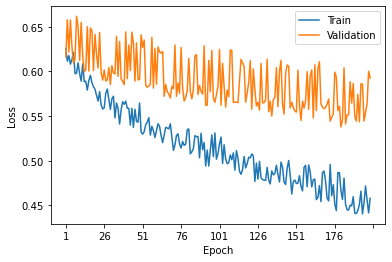

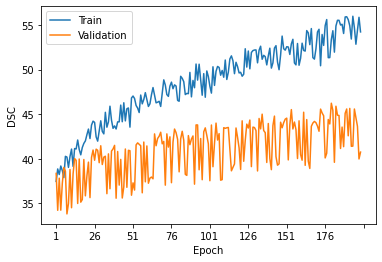

In [142]:
# Cargamos los datos
df_train_limpio = limpiaCSV(pd.read_csv("resultados/predeterminado/train.csv", header = None))
df_val_limpio = limpiaCSV(pd.read_csv("resultados/predeterminado/val.csv", header = None))
# Ploteamos Loss function y DSC
plotLossDSC(df_train_limpio,df_val_limpio)

Vemos que tanto la función de pérdida Loss como el DSC nos ofrecen resultados muy pobres, con un DSC del 40 % en validación. Además, al aumentar las epochs, la diferencia entre los test de validación y de entrenamiento aumenta, de forma que encontramos sobreentrenamiento.

## Modelo 2 

Con el fin de reducir el sobreentrenamiento, tratamos de aumentar el tamaño del Batch y la dimensión de los subvolúmenes:
+ Batch Size = 4
+ Subvolume dimension = (64,64,64)
+ Epochs = 200
+ Learning rate = 0.001
+ Optimizer = SDG


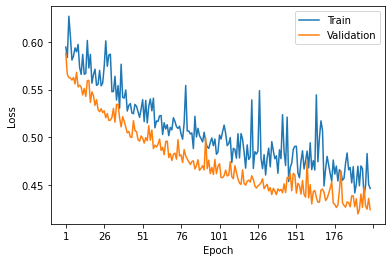

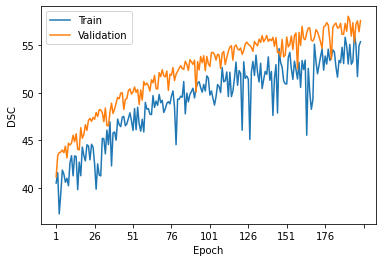

In [143]:
# Cargamos los datos
df_train_limpio = limpiaCSV(pd.read_csv("resultados/segundo/train.csv", header = None))
df_val_limpio = limpiaCSV(pd.read_csv("resultados/segundo/val.csv", header = None))
# Ploteamos Loss function y DSC
plotLossDSC(df_train_limpio,df_val_limpio)

Conseguimos nuestro objetivo: el sobreentrenamiento se ha reducido. Esta es la primera conclusión. No obstante, las métricas siguen siendo demasiado bajas.

## Modelo 3

Para intentar mejorar nuestros resultados, intentamos implementar data augmentation. Los parámetros con los que ajustamos nuestro siguiente modelo son los mismos que los anteriores pero con la diferencia de que activamos la Augmentation:
+ Batch Size = 4
+ Subvolume dimension = (32,32,32)
+ Epochs = 200
+ Learning rate = 0.001
+ Optimizer = SDG
+ Augmentation = True

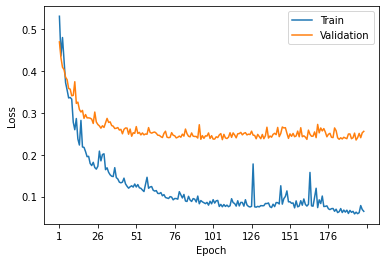

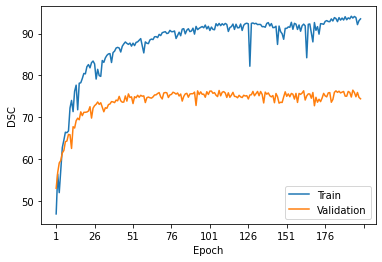

In [144]:
# Cargamos los datos
df_train_limpio = limpiaCSV(pd.read_csv("resultados/tercero/train.csv", header = None))
df_val_limpio = limpiaCSV(pd.read_csv("resultados/tercero/val.csv", header = None))
# Ploteamos Loss function y DSC
plotLossDSC(df_train_limpio,df_val_limpio)

Vemos que obtenemos una gran mejora de las métricas pero llega un punto, pasada la Epoch = 25 donde el sobreentrenamiento aumenta demasiado. Aumenta la diferencia entre las métricas de Train y de Validation pero sin obtener una mejora en Validation, que se estanca.

## Modelo 4

Dado que anteriormente hemos visto que el aumento del Batch Size reducía el sobreentrenamiento ahora haremos lo mismo pero manteniendo la Augmentation activada. Los parámetros de este modelo son los siguientes:
+ Batch Size = 8
+ Subvolume dimension = (128,128,128)
+ Epochs = 200
+ Learning rate = 0.001
+ Optimizer = SDG
+ Augmentation = True

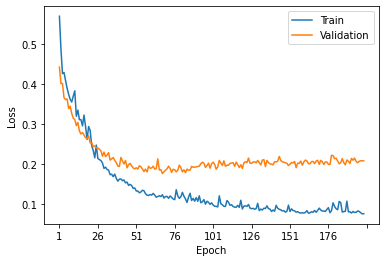

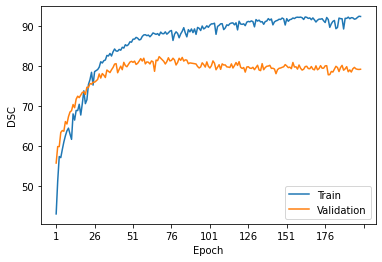

In [145]:
# Cargamos los datos
df_train_limpio = limpiaCSV(pd.read_csv("resultados/cuarto/train.csv", header = None))
df_val_limpio = limpiaCSV(pd.read_csv("resultados/cuarto/val.csv", header = None))
# Ploteamos Loss function y DSC
plotLossDSC(df_train_limpio,df_val_limpio)

Vemos que aumentamos el valor de DSC, llegando a obtener 87.5772 en Training y 82.2950 en Validation. Si bien existe sobreentrenamiento la diferencia en esta Epoch es de en torno a un 6%, lo cual no es un valor excesivamente alto. En las Epochs siguientes el sobreentrenamiento no para de aumentar, pues el DSC en Train no deja de aumentar mientras que el DSC de Validation comienza a disminuir.
Por otro lado, podemos ver cómo se predicen cada una de las 4 clases que tenemos. Air es el fondo, que como vemos se predice a la perfección prácticamente. GM y WM son materia gris y materia blanca, ambas tienen un sobreentrenamiento muy bajo y se predicen correctamente en torno al 80%. CSF es el fluido cerebro-espinal, en este es donde encontramos mayor sobreentrenamiento. Esto puede ser debido a que este fluido, por su composición sea más difícil de adivinar o que varíe más de unos sujetos a otros.

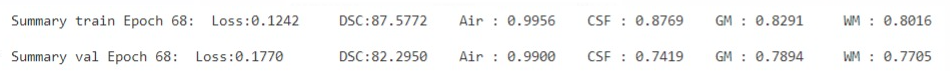